# Prelude

In [2]:
import numpy
import os
import matplotlib
import seaborn

import pandas

from matplotlib import pyplot

In [3]:
seaborn.set()

# Task 1

In [109]:
data = pandas.read_csv('long_task1_data.csv')

In [110]:
data.head()

,epochs,steps_0,steps_1,steps_2,steps_3,diff_0,diff_1,diff_2,diff_3,qmean_0,qmean_1,qmean_2,qmean_3
0,1,NaN,NaN,NaN,NaN,0.019662,0.019662,0.006904,0.016334,0.481869,0.481869,0.473702,0.478884
1,2,NaN,NaN,NaN,NaN,0.010484,0.007330,0.006424,0.015092,0.486709,0.484914,0.473659,0.482497
2,3,NaN,NaN,NaN,NaN,0.007066,0.004153,0.003650,0.006140,0.488223,0.483255,0.473753,0.479847
3,4,NaN,NaN,NaN,NaN,0.108841,0.007891,0.003939,0.007893,0.590051,0.481782,0.474365,0.481708
4,5,NaN,NaN,NaN,NaN,0.004074,0.006790,0.003840,0.005686,0.588245,0.479883,0.474975,0.479565


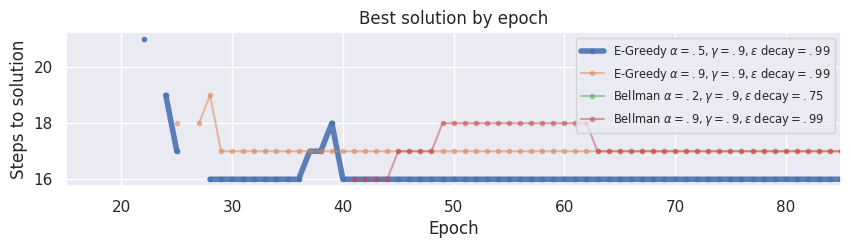

In [121]:
pyplot.rcParams['figure.figsize'] = 10, 2
pyplot.plot(data.steps_0, linewidth = 4, alpha = .9, marker = '.', label = r'E-Greedy $\alpha = .5, \gamma = .9, \varepsilon\;\text{decay} = .99$')
pyplot.plot(data.steps_1, alpha = .5, marker = '.', label = r'E-Greedy $\alpha = .9, \gamma = .9, \varepsilon\;\text{decay} = .99$')
pyplot.plot(data.steps_2, alpha = .5, marker = '.', label = r'Bellman $\alpha = .2, \gamma = .9, \varepsilon\;\text{decay} = .75$')
pyplot.plot(data.steps_3, alpha = .5, marker = '.', label = r'Bellman $\alpha = .9, \gamma = .9, \varepsilon\;\text{decay} = .99$')

pyplot.xlim(15, 85)

# pyplot.gca().axhline(16, linestyle = '--', linewidth = 1, color = 'black', alpha = .5, label = 'Best possible score = 16')

pyplot.title('Best solution by epoch')
pyplot.xlabel('Epoch')
pyplot.ylabel('Steps to solution')
pyplot.legend(fontsize = 'x-small', loc = 0)

pyplot.savefig('task1_best_solution_by_epoch.png', bbox_inches = 'tight', pad_inches = 0, dpi = 300)

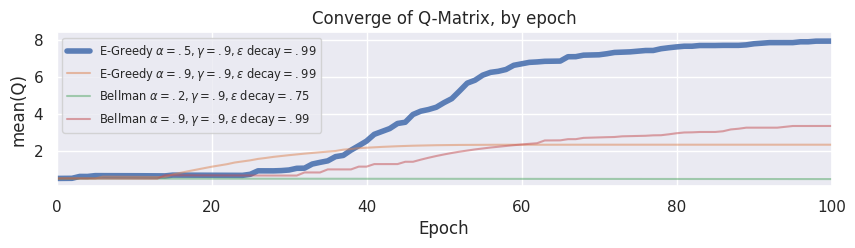

In [123]:
pyplot.rcParams['figure.figsize'] = 10, 2
pyplot.plot(data.qmean_0, linewidth = 4, alpha = .9, label = r'E-Greedy $\alpha = .5, \gamma = .9, \varepsilon\;\text{decay} = .99$')
pyplot.plot(data.qmean_1, alpha = .5, label = r'E-Greedy $\alpha = .9, \gamma = .9, \varepsilon\;\text{decay} = .99$')
pyplot.plot(data.qmean_2, alpha = .5, label = r'Bellman $\alpha = .2, \gamma = .9, \varepsilon\;\text{decay} = .75$')
pyplot.plot(data.qmean_3, alpha = .5, label = r'Bellman $\alpha = .9, \gamma = .9, \varepsilon\;\text{decay} = .99$')

pyplot.xlim(0, 100)
# pyplot.ylim(0, .75)

pyplot.title('Converge of Q-Matrix, by epoch')
pyplot.xlabel('Epoch')
pyplot.ylabel('mean(Q)')
pyplot.legend(fontsize = 'x-small')

# pyplot.gca().yaxis.tick_right()

pyplot.savefig('task1_qmatrix_convergence.png', bbox_inches = 'tight', pad_inches = 0, dpi = 300)

# Task 2

In [111]:
params = pandas.read_csv('task2_rinks.csv')
params['id'] = numpy.where(
    params.method == 'DQN',
    numpy.where(
        params.hidden_size == 256,
        0,
        1,
    ),
    numpy.where(
        params.method == 'TargetNetwork',
        numpy.where(
            params.eps_start == 0.8,
            2,
            3,
        ),
        numpy.where(
            params.eps_start == 1,
            4,
            5,
        )
    )
)
params = params[params.episode <= 300]

In [112]:
params.head()

,episode,method,hidden_size,lr,gamma,eps_start,eval_rewards,eval_dones,loss,q_step,id
0,1,DQN,256,0.001,0.99,0.5,-11566.056641,0,26797476.00,-337.525787,0
1,2,DQN,256,0.001,0.99,0.5,-9991.342773,343,18948568.00,-1358.698730,0
2,3,DQN,256,0.001,0.99,0.5,-11287.327148,156,7879360.00,-3492.517334,0
3,4,DQN,256,0.001,0.99,0.5,-11331.820312,43,3902096.75,-3737.399170,0
4,5,DQN,256,0.001,0.99,0.5,-10168.174805,468,3758660.00,-3865.496338,0


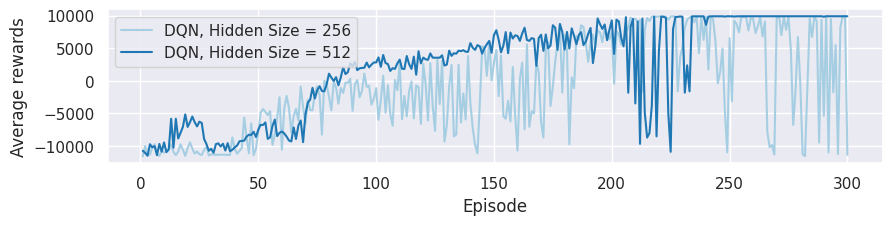

In [134]:
pyplot.rcParams['figure.figsize'] = 10, 2
seaborn_colors = seaborn.color_palette('Paired', 6)

data = params[params.method == 'DQN']
for e, (key, values) in enumerate(data.groupby(['id', 'method', 'hidden_size', 'lr', 'gamma', 'eps_start']), start = 1):
    pyplot.plot(values.episode, values.eval_rewards, label = f'DQN, Hidden Size = {key[2]}', color = seaborn_colors[key[0]])

pyplot.legend()

# pyplot.title('Average rewards per epoch using DQN')
pyplot.xlabel('Episode')
pyplot.ylabel('Average rewards')

pyplot.savefig('dqn_reward_size.png', bbox_inches = 'tight', pad_inches = 0, dpi = 300)

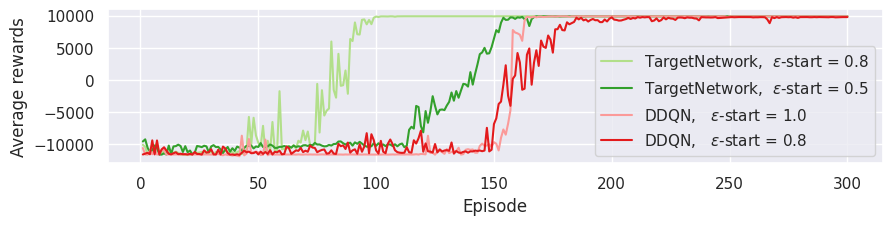

In [135]:
pyplot.rcParams['figure.figsize'] = 10, 2

data = params[(params.method == 'TargetNetwork') | (params.method == 'DDQN')]
for e, (key, values) in enumerate(data.groupby(['id', 'method', 'hidden_size', 'lr', 'gamma', 'eps_start']), start = 3):
    pyplot.plot(values.episode, values.eval_rewards, label = f'{key[1]},\t$\\varepsilon$-start = {key[5]}', color = seaborn_colors[key[0]])

pyplot.legend()

# pyplot.title('Average rewards per epoch using Target Network')
pyplot.xlabel('Episode')
pyplot.ylabel('Average rewards')

pyplot.savefig('rest_reward_size.png', bbox_inches = 'tight', pad_inches = 0, dpi = 300)

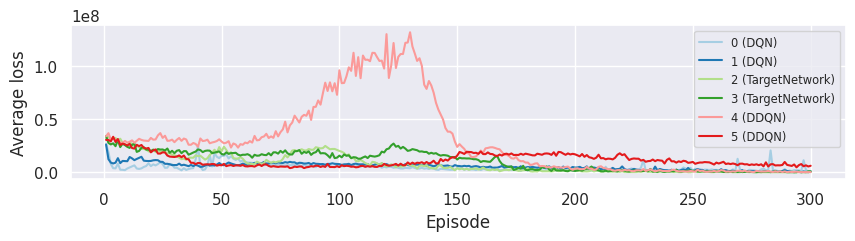

In [138]:
pyplot.rcParams['figure.figsize'] = 10, 2

data = params
for e, (key, values) in enumerate(data.groupby(['id', 'method', 'hidden_size', 'lr', 'gamma', 'eps_start']), start = 1):
    pyplot.plot(values.episode, values.loss, label = f'{key[0]} ({key[1]})', color = seaborn_colors[key[0]])

pyplot.legend(fontsize = 'x-small')

# pyplot.title('Average rewards per epoch using DQN')
pyplot.xlabel('Episode')
pyplot.ylabel('Average loss')

pyplot.savefig('losses.png', bbox_inches = 'tight', pad_inches = 0, dpi = 300)

Text(0, 0.5, 'Average rewards')

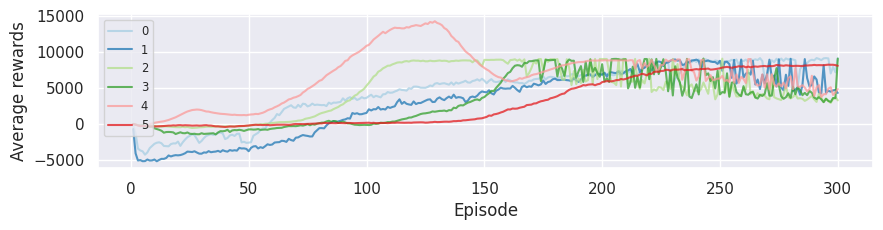

In [139]:
pyplot.rcParams['figure.figsize'] = 10, 2

data = params
for e, (key, values) in enumerate(data.groupby(['id', 'method', 'hidden_size', 'lr', 'gamma', 'eps_start']), start = 1):
    pyplot.plot(values.episode, values.q_step, label = f'{key[0]}', color = seaborn_colors[key[0]], alpha = .75)

pyplot.legend(fontsize = 'x-small')

# pyplot.title('Average rewards per epoch using DQN')
pyplot.xlabel('Episode')
pyplot.ylabel('Average rewards')

# pyplot.savefig('dqn_reward_size.png', bbox_inches = 'tight', pad_inches = 0, dpi = 300)